# Exercise 1.2: Visualize uncertainty
prepared by M.Hauser

In this exercise we will repeat the material we learned in the first exercise & get to know some more helpful plotting functions:

 * `errorbar` to visualise error bars
 * `fill_between` to add uncertainty bands
 * `axhline` and `axvline` to add horizontal and vertical lines that span the whole axes
 * `axhspan` and `axvspan` to add horizontal and vertical patches that span the whole axes

As example data, we will use global mean temperature from all CMIP5 models (Taylor et al., 2012). The data was prepared in another [notebook](./../data/prepare_CMIP5_tas_time_series.ipynb).

We will develop a plot showing the time evolution and model uncertainty of global mean temperature from 1870 to 2000 using CMIP5 data.

## Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import netCDF4 as nc

%matplotlib inline

## Load  & process data

In [3]:
# load data

fN = '../data/cmip5_tas_rcp85_ts.nc'

ncf = nc.Dataset(fN)

# the with construct automatically closes the dataset once we are done
with nc.Dataset(fN) as ncf:
    
    year = ncf.variables['year'][:]
    tas = ncf.variables['tas'][:]

In [ ]:
# print some info

print('shape of time axis:', year.shape)      
print('shape of temperature data:', tas.shape)

print('')
print('Excerpt of time:', year[:5])
print('Excerpt of temperature data:', tas[:3, 0])

In [5]:
# calculate the anomaly with respect to 1971..2000

# select all years in this range
sel = (year >= 1971) & (year <= 2000)

# calculate the climatology for each model
clim = tas[:, sel].mean(axis=1)

# calculate the anomaly

# we need to add an axis such that the broadcasting works
tas_anom = tas - clim[:, np.newaxis]

### Explanation of the last line

`tas` has shape (40, 231) and `clim` has shape (40). To calculate `clim -  tas` the variable `clim` needs to have shape (40, 1) - it is then automatically broadcast to the shape (40, 231). This can be achieved with `clim[:, np.newaxis]`. For more details see the [numpy broadcasting rules](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html).

## Exercise 

 * Plot the multi model mean temperature anomaly (Hint: `mmm = tas_anom.mean(axis=0)`)
 * Make the line thicker (Hint: `linewidth` or `lw`).
 * Add x- and y- labels.
 * Add a title. Set the `fontsize` to 14
 * Add a horizontal line at 0. (Hint: `ax.plot(ax.get_xlim(), [0, 0], color='0.1')`)
 * Realise that this is not very helpful.
 * Use `ax.axhline` instead. Set the linewidth to 0.5, and the color to a light grey.
 * Use `ax.axvspan` to shade the years of the climatolotgy (1971 to 2000).

In [ ]:
f, axes = plt.subplots(1, 1)
ax = axes


### Solution

In [ ]:
f, axes = plt.subplots(1, 1)
ax = axes

mmm = tas_anom.mean(axis=0)

h = ax.plot(year, mmm, lw=2)

ax.set_ylabel('Tanom [°C]')
ax.set_xlabel('Time')

ax.set_title('Global mean temperature', fontsize=14)

ax.axhline(0, color='0.1', lw=0.5)

ax.axvspan(1971, 2000, color='0.75')

plt.show()

## Exercise
 
 * Continue with the previous plot (see below).
 * Add each model as individual line.
 * It's way too many models to differentiate between them, so paint them all in a light blue (`'#a6bddb'`).

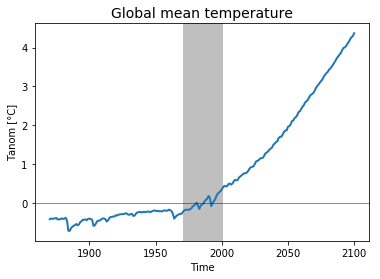

In [6]:
f, axes = plt.subplots(1, 1)
ax = axes

mmm = tas_anom.mean(axis=0)

# this loops through each row in the array
for y in tas_anom:
    # plot here
    pass

h = ax.plot(year, mmm, lw=2)

ax.set_ylabel('Tanom [°C]')
ax.set_xlabel('Time')

ax.set_title('Global mean temperature', fontsize=14)

ax.axhline(0, color='0.1', lw=0.5)

ax.axvspan(1971, 2000, color='0.75')

plt.show()

### Solution

In [ ]:
f, axes = plt.subplots(1, 1)
ax = axes

for y in tas_anom:  
    ax.plot(year, y, '#a6bddb')


mmm = tas_anom.mean(axis=0)

h = ax.plot(year, mmm, lw=2)

ax.set_ylabel('Tanom [°C]')
ax.set_xlabel('Time')

ax.set_title('Global mean temperature', fontsize=14)

ax.axhline(0, color='0.1', lw=0.5)

ax.axvspan(1971, 2000, color='0.85')


## Errorbar

Plotting the uncertainty of data may just be as important as ploting the data itself. A basic errorbar can be created using `plt.errorbar`.

#### create some data including uncertainty

In [7]:
x = np.arange(0, 2*np.pi, 0.25)

y_err = 0.75

y = np.sin(x) + np.random.randn(*x.shape) * y_err

<ErrorbarContainer object of 3 artists>

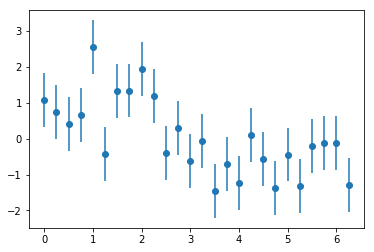

In [8]:
plt.errorbar(x, y, yerr=y_err, linestyle='', marker='o')

There is loads of ways on how to format the errorbars:

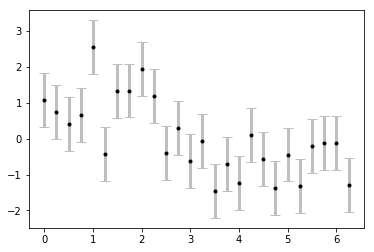

In [9]:
plt.errorbar(x, y,
             yerr=y_err,
             marker='.',
             linestyle='',
             color='black',
             ecolor='0.75',
             elinewidth=3,
             capsize=5);

## Exercise

 * Let's replace the individual models by a errorbars indicating the standard deviation.
 * Replace the `ax.plot` command with `ax.errorbar`.
 * Use a slightly lighter blue ('#74a9cf') for the color of the error bars. 
 * It has too many error lines. Read the docstring of errorbar (`plt.errorbar?`) to find out if we can only plot every 5th error bar.


In [ ]:
f, axes = plt.subplots(1, 1)
ax = axes

mmm = tas_anom.mean(axis=0)

# calculate std
# std = 

# replace plot
h = ax.plot(year, mmm, lw=2)

ax.set_ylabel('Tanom [°C]')
ax.set_xlabel('Time')

ax.set_title('Global mean temperature', fontsize=14)

ax.axhline(0, color='0.1', lw=0.5)

ax.axvspan(1971, 2000, color='0.85')


### Solution

In [ ]:
f, axes = plt.subplots(1, 1)
ax = axes

mmm = tas_anom.mean(axis=0)

# calculate std
std = tas_anom.std(axis=0)

# plot errorbar
ax.errorbar(year, mmm, lw=2, yerr=std, errorevery=5, elinewidth=1, ecolor='#74a9cf')

ax.set_ylabel('Tanom [°C]')
ax.set_xlabel('Time')

ax.set_title('Global mean temperature', fontsize=14)

ax.axhline(0, color='0.1', lw=0.5)

ax.axvspan(1971, 2000, color='0.85')

plt.show()

## Continuous Errors

For continious errors the `errorbar` function is not very convinient, but we can use `fill_between`. This function takes `x`, `y1`, and `y2` as input and shades the region between `y1` and `y2`.


In [ ]:
f, ax = plt.subplots()

ax.fill_between(x, np.sin(x), np.cos(x), color='0.75')
ax.plot(x, (np.sin(x) + np.cos(x)) / 2)

## Exercise

 * Let's replace the individual models by a shaded region indicating the standard deviation.
 * Use `ax.fill_between`.
 * The box indicating the reference period gets plotted over the std of the models, use the `zorder` keyword in `axvspan` to correct this.
 


In [ ]:
f, axes = plt.subplots(1, 1)
ax = axes

mmm = tas_anom.mean(axis=0)

# calculate std
std = tas_anom.std(axis=0)

# plot here


h = ax.plot(year, mmm, lw=2)

ax.set_ylabel('Tanom [°C]')
ax.set_xlabel('Time')

ax.set_title('Global mean temperature', fontsize=14)

ax.axhline(0, color='0.1', lw=0.5)

ax.axvspan(1971, 2000, color='0.85')

plt.show()

### Solution

In [ ]:
f, axes = plt.subplots(1, 1)
ax = axes

mmm = tas_anom.mean(axis=0)
std = tas_anom.std(axis=0)

ax.fill_between(year, mmm - std, mmm + std, color='#a6bddb')

h = ax.plot(year, mmm, lw=2)

ax.set_ylabel('Tanom [°C]')
ax.set_xlabel('Time')

ax.set_title('Global mean temperature', fontsize=14)

ax.axhline(0, color='0.1', lw=0.5)

ax.axvspan(1971, 2000, color='0.85', zorder=0)

plt.show()
